<a href="https://colab.research.google.com/github/PrincesLu/Sentiment-Analysis-Twitter/blob/main/Sentiment_Analysis_Twitter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


# EDA

In [ ]:
# Loading the data set 
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='Latin-1', names=('target', 'id', 'date', 'flag', 'username', 'tweet'))
df.head()

,target,id,date,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Exploring the Dataset 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   flag      1600000 non-null  object
 4   username  1600000 non-null  object
 5   tweet     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


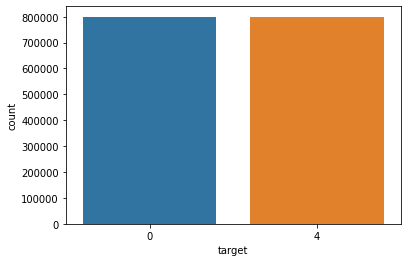

In [ ]:
# Countplot for the accurence of each target value 
sns.countplot(x='target', data=df)

In [ ]:
# dropped the irrelevant colums that will not be used in sentiment analysis 
df.drop(['date', 'flag', 'username'], axis = 1, inplace = True)
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# DATA PROCESSING

In [ ]:
# for stop words (useless data out)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# FOR LEMMATIZATION
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# FOR STEMMING
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# functionn for nlp pipeline
def data_preprocessing(raw_text):

    #Data Cleansing
    sentence = re.sub(r'[^\w\s]', ' ',str(raw_text) )


    #Removing numbers
    sentence = re.sub(r'[0-9]', '', str(sentence))
    
    #Tokenization
    words = nltk.word_tokenize(sentence)

    #Lowercase
    for word in words:
            word.lower()
    
    #Stop words removal
    words = [w for w in words if not w in stop_words]
    
    #stemming
    words = [stemmer.stem(w) for w in words]
    
    #Lemmatization
    final_words = [lemmatizer.lemmatize(w) for w in words]
    
    return  final_words 

In [ ]:
df.tweet = df.tweet.apply(data_preprocessing)